In [ ]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import os,sys,time
import pandas as pd


In [3]:

def new_timestamp(timest):
    y=timest[:4]
    m=timest[4:6]
    d=timest[6:8]
    h=int(timest[8:10])
    min=int(timest[10:12])
    s=int(timest[12:])   
    s_p     =  DF["time"] + s
    min_p   =  np.floor(s_p/60) +min
    h_p     =  np.floor(min_p/60) +h


    s_n     = s_p%60
    min_n   = min_p%60
    h_n     = h_p%60

    timest_new=[]
    for i in np.arange(0,len(h_n),1):
        timest_new.append("%s%s%s%i%i%i"%(y,m,d,h_n[i],min_n[i],s_n[i]))
        
        
        
    return timest_new

def sep_timestamp(timest):

    timest_new=[]
    for i in np.arange(0,len(timest),1):
        h=timest[i][8:10]
        min=timest[i][10:12]
        s=timest[i][12:] 

        timest_new.append( "%s%s%s"%(h,min,s) )

    return timest_new

In [4]:
file="./labview_data/20230609_pid_test_2.txt"

In [5]:
f=open(file)
timest=f.readlines()[2][:-1]


In [6]:
names=["time","xe_cell","cold_fing","nit_res","tc1","tc2","tc3","p_cell","p_man","flow","valv","heat","low_lim","high_lim","res_lim"]
DF=pd.read_table(file,delimiter=",",names=names,skiprows=[0,1,2,3])

f=open(file)

timest=f.readlines()[2][:-1]


#DF["timestamp"]=new_timestamp(timest)

#DF["timest"] =sep_timestamp(DF["timestamp"])

DF

,time,xe_cell,cold_fing,nit_res,tc1,tc2,tc3,p_cell,p_man,flow,valv,heat,low_lim,high_lim,res_lim
0,0,273.427,285.469,229.182,293.442,293.857,293.302,0.035,0.022,0.000,1,0,161.0,165.0,80.0
1,2,273.370,285.417,217.870,293.431,293.853,293.288,0.035,0.022,0.000,1,0,161.0,165.0,80.0
2,4,273.340,285.365,214.921,293.424,293.842,293.274,0.035,0.022,0.000,1,0,161.0,165.0,80.0
3,6,273.283,285.301,213.766,293.398,293.839,293.263,0.036,0.023,0.000,1,0,161.0,165.0,80.0
4,8,273.230,285.242,212.155,293.395,293.821,293.237,0.035,0.022,0.000,1,0,161.0,165.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,7476,155.355,170.913,83.202,184.597,186.210,172.221,0.036,1.317,-0.000,0,1,171.0,186.0,85.0
3739,7478,155.332,170.907,83.879,184.606,186.205,172.221,0.035,1.317,-0.000,0,1,171.0,186.0,85.0
3740,7480,155.337,170.912,83.745,184.611,186.195,172.220,0.035,1.314,-0.000,0,1,171.0,186.0,85.0
3741,7482,155.326,170.907,84.062,184.630,186.200,172.241,0.035,1.309,-0.000,0,1,171.0,186.0,85.0


<ErrorbarContainer object of 3 artists>

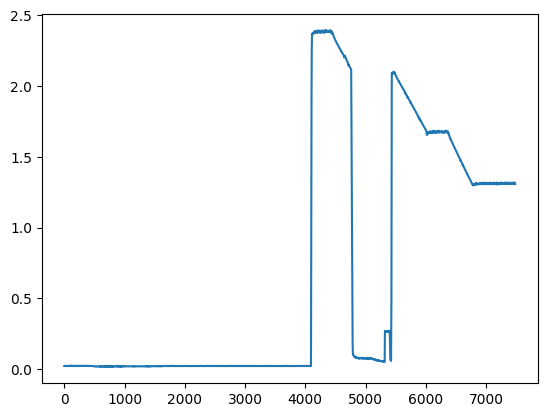

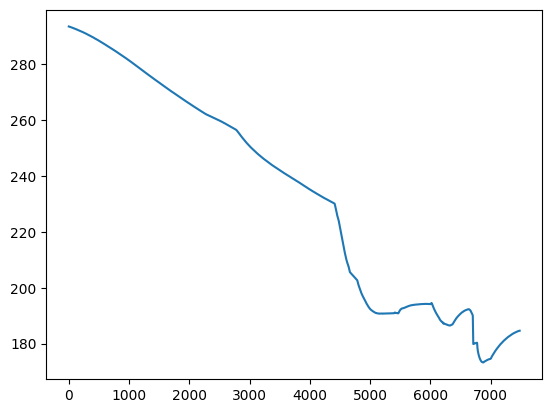

In [7]:
fig = plt.figure()

plt.errorbar(x=DF['time'], y=DF['p_man'])
fig = plt.figure()
plt.errorbar(x=DF['time'], y=DF['tc1'])

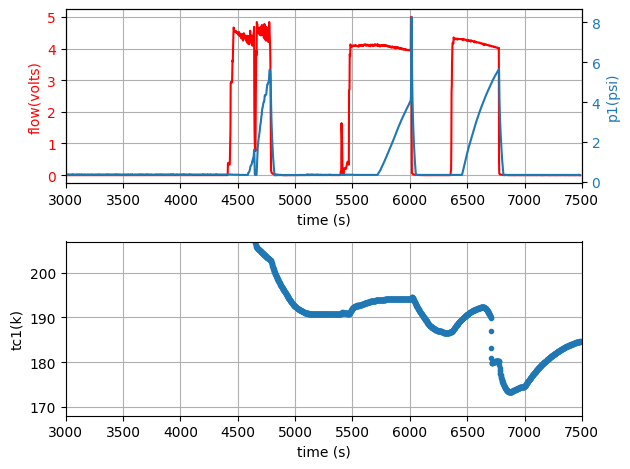

In [16]:

fig, (ax1,ax3) = plt.subplots(2)

ax1.set_xlabel('time (s)',color='black')
ax1.set_ylabel('flow(volts)',color='r')
ax1.plot(DF["time"], DF["flow"], color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('p1(psi)', color=color)  # we already handled the x-label with ax1
ax2.plot(DF['time'], DF['p_cell']*10, color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax1.set_yscale('log')
#ax2.set_yscale('log')
ax1.set_xlim(3000,7500)
ax1.grid(True) 



ax3.errorbar(x=DF['time'], y=DF['tc1'],fmt=".")
ax3.errorbar(x=DF['time'], y=DF['xe_cell'])
ax3.grid(True)
ax3.set_ylabel('tc1(k)')
ax3.set_xlabel('time (s)')
ax3.set_xlim(3000,7500)
ax3.set_ylim(168,207)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [9]:
(4400-4150)/60.0

4.166666666666667